## Import Common Package

In [78]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.neighbors import KNeighborsRegressor

In [100]:
#Change Decimal
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Import Data

In [2]:
df = pd.read_csv('Car details v3.csv')
pd.options.display.max_columns = 999
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Data Preparation

In [3]:
df_1 = df.copy()

In [4]:
## Remove String on Mileage
df_1['mileage'] = df_1['mileage'].str[:-5]
df_1['mileage'] = df_1['mileage'].astype('float64')

In [5]:
## Remove String on Engine
df_1['engine'] = df_1['engine'].str[:4]
df_1['engine'] = df_1['engine'].astype('float64')

In [6]:
## Remove String on MaxPower
df_1['max_power'] = df_1['max_power'].str[:-4]
df_1['max_power'] = df_1['max_power'].replace('', )
df_1['max_power'] = df_1['max_power'].astype('float64')

In [7]:
### One Hot Encoding Column fuel, seller_type, transmission (don't have levelling)
df_1 =  pd.get_dummies(data=df_1, columns=['fuel', 'seller_type', 'transmission'])

In [8]:
### Label Encoding column owner
df_1['owner'] = df_1['owner'].map({'First Owner' : 4, 'Second Owner' : 3, 'Third Owner' : 2, 'Fourth & Above Owner' : 1, 'Test Drive Car':0 })

In [9]:
df_1.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,4,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,0,1,0,0,0,1,0,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,3,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,0,1,0,0,0,1,0,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,2,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,0,1,0,1,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,4,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,0,1,0,0,0,1,0,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,4,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,0,1,0,1,0,0,1


In [10]:
print(df_1.shape)

(8128, 19)


In [11]:
df_1.isna().sum()

name                              0
year                              0
selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                       215
torque                          222
seats                           221
fuel_CNG                          0
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Dealer                0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Automatic            0
transmission_Manual               0
dtype: int64

In [12]:
(221/8128)*100
## Null value percentage = 2.7% ==> first alternative we drop NULL value, second alternative we fillna 

2.718996062992126

### Alternatif Data Frame 1 - Drop NA

In [13]:
df_clean1 = df_1.copy()

In [14]:
df_clean1 = df_clean1.dropna()

In [15]:
df_clean1.isna().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
owner                           0
mileage                         0
engine                          0
max_power                       0
torque                          0
seats                           0
fuel_CNG                        0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
dtype: int64

### Alternatif Data Frame 2 - FILL NA

In [16]:
df_clean2 = df_1.copy()

In [17]:
df_clean2.isna().sum()

name                              0
year                              0
selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                       215
torque                          222
seats                           221
fuel_CNG                          0
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Dealer                0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Automatic            0
transmission_Manual               0
dtype: int64

In [18]:
df_clean2['mileage'] = df_clean2['mileage'].fillna(df_clean2['mileage'].mean())

In [19]:
df_clean2['engine'] = df_clean2['engine'].fillna(df_clean2['engine'].mean())

In [20]:
df_clean2['max_power'] = df_clean2['max_power'].fillna(df_clean2['max_power'].mean())

In [21]:
## Column torque will not use for model

In [22]:
df_clean2['seats'] = df_clean2['seats'].fillna(df_clean2['seats'].mean())

## Machine Learning Modelling

In [23]:
## Define Function Evaluation Matrix
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE 

### 1. Lasso Algorithm

#### 1a. Lasso Basic Model with df_clean1

In [24]:
Model_L = Lasso()

In [25]:
df_clean1.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,4,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,0,1,0,0,0,1,0,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,3,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,0,1,0,0,0,1,0,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,2,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,0,1,0,1,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,4,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,0,1,0,0,0,1,0,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,4,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,0,1,0,1,0,0,1


In [26]:
X_1 = df_clean1.drop(columns=['name', 'selling_price', 'torque'])
y_1 = df_clean1['selling_price']

In [27]:
### Splitting the data for machine training and testing 

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = .2, random_state = 42)

In [28]:
### Model Learn
Model_L.fit(X_train_1, y_train_1)

Lasso()

In [29]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseLasso, MAE_trainBaseLasso, MSE_trainBaseLasso, RMSE_trainBaseLasso = Eva_Matrix(Model_L, X_train_1, y_train_1)
r2_test_BaseLasso, MAE_test_BaseLasso, MSE_test_BaseLasso, RMSE_test_BaseLasso = Eva_Matrix(Model_L, X_test_1, y_test_1)

dataLasso1 = {
    "Training" : [r2_trainBaseLasso, MAE_trainBaseLasso, MSE_trainBaseLasso, RMSE_trainBaseLasso ],
    "Testing" : [r2_test_BaseLasso, MAE_test_BaseLasso, MSE_test_BaseLasso, RMSE_test_BaseLasso ]
}

pd.DataFrame(data = dataLasso1, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.750495e-01,6.953772e-01
MAE,2.752491e+05,2.697356e+05
MSE,2.123434e+11,2.117991e+11
RMSE,4.608073e+05,4.602163e+05


In [30]:
## Error Check

In [31]:
df_baseerror_train = X_train_1.copy()
y_pred_train1 = Model_L.predict(X_train_1)

df_baseerror_train['train_target'] = y_train_1
df_baseerror_train['train_prediksi'] = y_pred_train1
df_baseerror_train['train_error'] = abs(df_baseerror_train['train_target'] - df_baseerror_train['train_prediksi'])

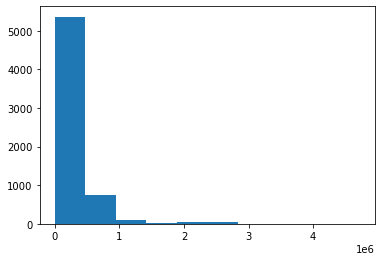

In [32]:
plt.hist(df_baseerror_train['train_error'])
plt.show()

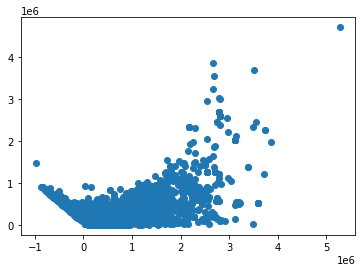

In [33]:
plt.scatter(df_baseerror_train['train_prediksi'], df_baseerror_train['train_error'])
plt.show()

In [34]:
df_baseerror_test = X_test_1.copy()
y_pred_test1 = Model_L.predict(X_test_1)

df_baseerror_test['test_target'] = y_test_1
df_baseerror_test['test_prediksi'] = y_pred_test1
df_baseerror_test['test_error'] = abs(df_baseerror_test['test_target'] - df_baseerror_test['test_prediksi'])

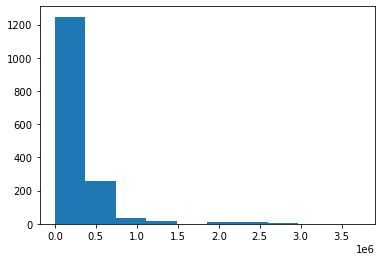

In [35]:
plt.hist(df_baseerror_test['test_error'])
plt.show()

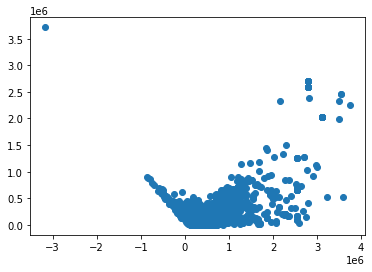

In [36]:
plt.scatter(df_baseerror_test['test_prediksi'], df_baseerror_test['test_error'])
plt.show()

#### 1b. Lasso Basic Model with df_clean2

In [37]:
X_2 = df_clean2.drop(columns=['name', 'selling_price', 'torque'])
y_2 = df_clean2['selling_price']

In [38]:
### Splitting the data for machine training and testing 

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = .2, random_state = 42)

In [39]:
### Model Learn
Model_L.fit(X_train_2, y_train_2)

Lasso()

In [40]:
### Model Learn
Model_L.fit(X_train_2, y_train_2)

Lasso()

In [41]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseLasso2, MAE_trainBaseLasso2, MSE_trainBaseLasso2, RMSE_trainBaseLasso2 = Eva_Matrix(Model_L, X_train_2, y_train_2)
r2_test_BaseLasso2, MAE_test_BaseLasso2, MSE_test_BaseLasso2, RMSE_test_BaseLasso2 = Eva_Matrix(Model_L, X_test_2, y_test_2)

dataLasso2 = {
    "Training" : [r2_trainBaseLasso2, MAE_trainBaseLasso2, MSE_trainBaseLasso2, RMSE_trainBaseLasso2 ],
    "Testing" : [r2_test_BaseLasso2, MAE_test_BaseLasso2, MSE_test_BaseLasso2, RMSE_test_BaseLasso2 ]
}

pd.DataFrame(data = dataLasso2, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.781217e-01,6.890276e-01
MAE,2.728391e+05,2.707495e+05
MSE,2.087649e+11,2.038376e+11
RMSE,4.569080e+05,4.514838e+05


#### 1c. Lasso Polynomial with df_clean1a

df_clean1 is used because has r2 score better than df_clean2

In [42]:
df_clean1.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,4,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,0,1,0,0,0,1,0,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,3,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,0,1,0,0,0,1,0,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,2,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,0,1,0,1,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,4,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,0,1,0,0,0,1,0,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,4,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,0,1,0,1,0,0,1


In [43]:
# print(df_clean1.shape)

In [44]:
df_pol0 = pd.concat([df_clean1['year'], df_clean1['km_driven'], df_clean1['mileage'], df_clean1['engine'], df_clean1['max_power'], df_clean1['seats']], axis=1)

In [45]:
# print(df_pol0.shape)

In [46]:
poly = PolynomialFeatures(degree=2, include_bias=False)
#create features polynomial

num_col = df_pol0

num_Poly = poly.fit_transform(num_col)

df_Pol = pd.DataFrame(num_Poly)

## owner boleh dipoly gak?

In [48]:
print(df_Pol.shape)

(7906, 27)


In [49]:
df_pol01 = df_clean1.drop(columns=['name', 'torque','year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price' ]).reset_index()

In [50]:
print(df_pol01.shape)

(7906, 11)


In [52]:
df_x_pol = pd.concat([df_Pol, df_pol01], axis=1)

In [54]:
X_3 = df_x_pol.drop(columns=['index'])
y_3 = df_clean1['selling_price']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = .2, random_state = 42)

Model_L.fit(X_train_3, y_train_3)

r2_trainBaseLasso3, MAE_trainBaseLasso3, MSE_trainBaseLasso3, RMSE_trainBaseLasso3 = Eva_Matrix(Model_L, X_train_3, y_train_3)
r2_test_BaseLasso3, MAE_test_BaseLasso3, MSE_test_BaseLasso3, RMSE_test_BaseLasso3 = Eva_Matrix(Model_L, X_test_3, y_test_3)

dataLasso3 = {
    "Training" : [r2_trainBaseLasso3, MAE_trainBaseLasso3, MSE_trainBaseLasso3, RMSE_trainBaseLasso3],
    "Testing" : [r2_test_BaseLasso3, MAE_test_BaseLasso3, MSE_test_BaseLasso3, RMSE_test_BaseLasso3]
}

pd.DataFrame(data = dataLasso3, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.172597e-01,4.991324e-01
MAE,1.969435e+05,1.995225e+05
MSE,1.194142e+11,3.482448e+11
RMSE,3.455636e+05,5.901227e+05


### 2. Linear Regression Algorithm

In [55]:
Model_LR = LinearRegression()

#### 2a. Linear Regression Basic Model with df_clean1

In [56]:
### Model Learn
Model_LR.fit(X_train_1, y_train_1)

LinearRegression()

In [57]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseLR1, MAE_trainBaseLR1, MSE_trainBaseLR1, RMSE_trainBaseLR1 = Eva_Matrix(Model_LR, X_train_1, y_train_1)
r2_test_BaseLR1, MAE_test_BaseLR1, MSE_test_BaseLR1, RMSE_test_BaseLR1 = Eva_Matrix(Model_LR, X_test_1, y_test_1)

dataLR1 = {
    "Training" : [r2_trainBaseLR1, MAE_trainBaseLR1, MSE_trainBaseLR1, RMSE_trainBaseLR1],
    "Testing" : [r2_test_BaseLR1, MAE_test_BaseLR1, MSE_test_BaseLR1, RMSE_test_BaseLR1]
}

pd.DataFrame(data = dataLR1, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.750495e-01,6.953776e-01
MAE,2.752501e+05,2.697368e+05
MSE,2.123434e+11,2.117988e+11
RMSE,4.608073e+05,4.602160e+05


#### 2b. Linear Regression Basic Model with df_clean2

In [60]:
### Model Learn
Model_LR.fit(X_train_2, y_train_2)

LinearRegression()

In [61]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseLR2, MAE_trainBaseLR2, MSE_trainBaseLR2, RMSE_trainBaseLR2 = Eva_Matrix(Model_LR, X_train_2, y_train_2)
r2_test_BaseLR2, MAE_test_BaseLR2, MSE_test_BaseLR2, RMSE_test_BaseLR2 = Eva_Matrix(Model_LR, X_test_2, y_test_2)

dataLR2 = {
    "Training" : [r2_trainBaseLR2, MAE_trainBaseLR2, MSE_trainBaseLR2, RMSE_trainBaseLR2],
    "Testing" : [r2_test_BaseLR2, MAE_test_BaseLR2, MSE_test_BaseLR2, RMSE_test_BaseLR2]
}

pd.DataFrame(data = dataLR2, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.781217e-01,6.890276e-01
MAE,2.728399e+05,2.707506e+05
MSE,2.087649e+11,2.038376e+11
RMSE,4.569080e+05,4.514838e+05


#### 2c. Lasso Polynomial with df_clean1a

In [63]:
Model_LR.fit(X_train_3, y_train_3)

r2_trainBaseLR3, MAE_trainBaseLR3, MSE_trainBaseLR3, RMSE_trainBaseLR3 = Eva_Matrix(Model_LR, X_train_3, y_train_3)
r2_test_BaseLR3, MAE_test_BaseLR3, MSE_test_BaseLR3, RMSE_test_BaseLR3 = Eva_Matrix(Model_LR, X_test_3, y_test_3)

dataLR3 = {
    "Training" : [r2_trainBaseLR3, MAE_trainBaseLR3, MSE_trainBaseLR3, RMSE_trainBaseLR3],
    "Testing" : [r2_test_BaseLR3, MAE_test_BaseLR3, MSE_test_BaseLR3, RMSE_test_BaseLR3]
}

pd.DataFrame(data = dataLR3, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.703187e-01,8.351731e-01
MAE,1.728015e+05,1.754250e+05
MSE,8.474206e+10,1.146013e+11
RMSE,2.911049e+05,3.385282e+05


#### 2d. Linear Polynomial with dropping outstanding value

In [64]:
df_model3 = df_clean1.copy()

In [68]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [69]:
#check outliers
# Select columns to plot

cols_to_plot = df[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']]

Graph for name: Total = 2058


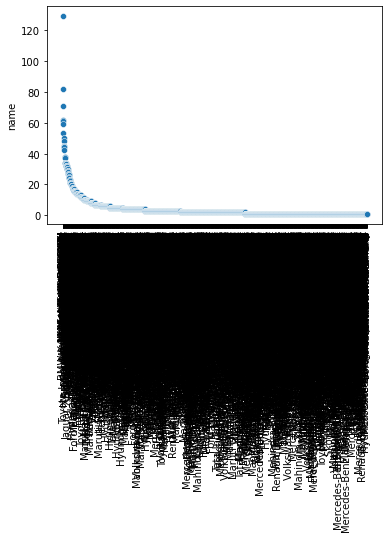

Graph for year: Total = 29


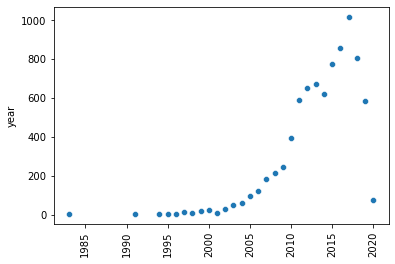

Graph for selling_price: Total = 677


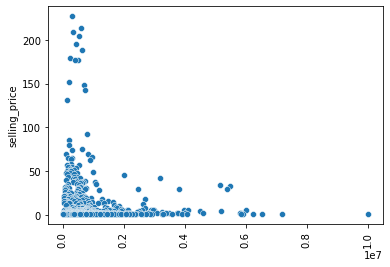

Graph for km_driven: Total = 921


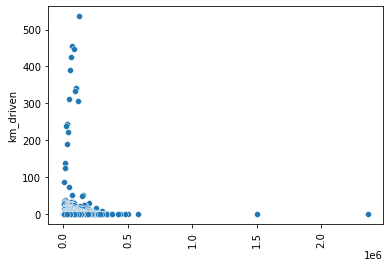

Graph for fuel: Total = 4


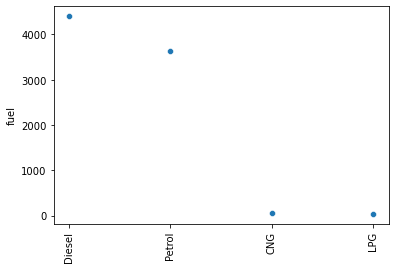

Graph for seller_type: Total = 3


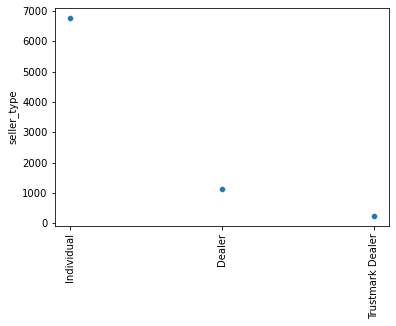

Graph for transmission: Total = 2


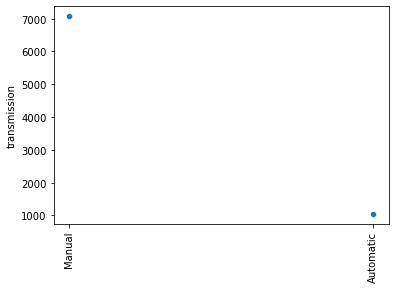

Graph for owner: Total = 5


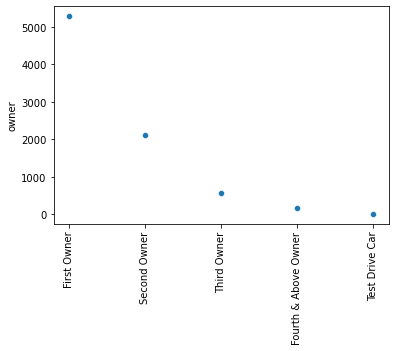

Graph for mileage: Total = 393


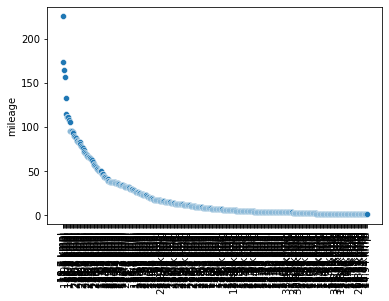

Graph for engine: Total = 121


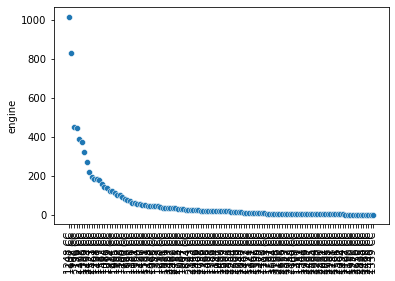

Graph for max_power: Total = 322


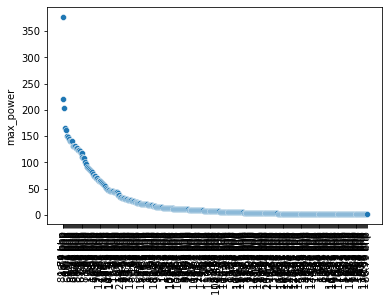

Graph for torque: Total = 441


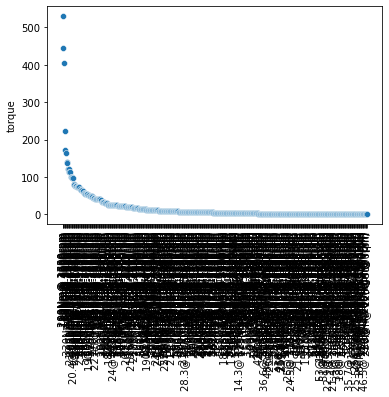

Graph for seats: Total = 9


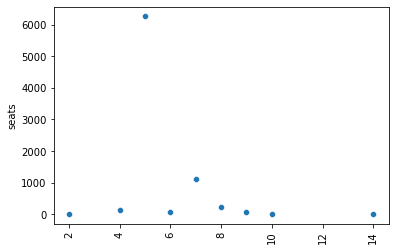

In [70]:
def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print(f'Graph for {i}: Total = {len(cat_num)}')
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
        
plot_scatterplots()

data to drop
- year <=1986
- seats >10
- max_power >300
- engine > 3500
- mileage <5 and >30 or >40
- km_driven >1000000
- selling_price >1


In [71]:
df_model3 = df_model3[df_model3.year > 1986]
df_model3 = df_model3[df_model3.seats < 10]
df_model3 = df_model3[df_model3.max_power < 300]
df_model3 = df_model3[df_model3.engine < 3500]
df_model3 = df_model3[df_model3.mileage < 30]
df_model3 = df_model3[df_model3.mileage > 5]
df_model3 = df_model3[df_model3.km_driven < 1000000]

In [72]:
df_pol_tes = pd.concat([df_model3['year'], df_model3['km_driven'], df_model3['mileage'], df_model3['engine'], df_model3['max_power'], df_model3['seats']], axis=1)

In [73]:
num_col_tes = df_pol_tes

num_Poly_tes = poly.fit_transform(num_col_tes)

df_Pol_tes = pd.DataFrame(num_Poly_tes)


In [74]:
df_pol01_tes = df_model3.drop(columns=['name', 'torque','year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price' ]).reset_index()

In [75]:
df_x_pol_tes = pd.concat([df_Pol_tes, df_pol01_tes], axis=1)

In [76]:
X_3_tes = df_x_pol_tes.drop(columns=['index'])
y_3_tes = df_model3['selling_price']

X_train_3_tes, X_test_3_tes, y_train_3_tes, y_test_3_tes = train_test_split(X_3_tes, y_3_tes, test_size = .2, random_state = 42)

Model_LR.fit(X_train_3_tes, y_train_3_tes)

r2_trainBaseLR3tes, MAE_trainBaseLR3tes, MSE_trainBaseLR3tes, RMSE_trainBaseLR3tes = Eva_Matrix(Model_LR, X_train_3_tes, y_train_3_tes)
r2_test_BaseLR3tes, MAE_test_BaseLR3tes, MSE_test_BaseLR3tes, RMSE_test_BaseLR3tes = Eva_Matrix(Model_LR, X_test_3_tes, y_test_3_tes)

dataLR3tes = {
    "Training" : [r2_trainBaseLR3tes, MAE_trainBaseLR3tes, MSE_trainBaseLR3tes, RMSE_trainBaseLR3tes],
    "Testing" : [r2_test_BaseLR3tes, MAE_test_BaseLR3tes, MSE_test_BaseLR3tes, RMSE_test_BaseLR3tes]
}

pd.DataFrame(data = dataLR3tes, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.803679e-01,8.745316e-01
MAE,1.649397e+05,1.737681e+05
MSE,7.598970e+10,8.525130e+10
RMSE,2.756623e+05,2.919782e+05


### 3. KNeighbors Regression Algorithm

In [79]:
Model_KNN = KNeighborsRegressor()

#### 3a. KNN Basic Model with df_clean1

In [81]:
### Model Learn
Model_KNN.fit(X_train_1, y_train_1)

KNeighborsRegressor()

In [85]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseKNN1, MAE_trainBaseKNN1, MSE_trainBaseKNN1, RMSE_trainBaseKNN1 = Eva_Matrix(Model_KNN, X_train_1, y_train_1)
r2_test_BaseKNN1, MAE_test_BaseKNN1, MSE_test_BaseKNN1, RMSE_test_BaseKNN1 = Eva_Matrix(Model_KNN, X_test_1, y_test_1)

dataKNN1 = {
    "Training" : [r2_trainBaseKNN1, MAE_trainBaseKNN1, MSE_trainBaseKNN1, RMSE_trainBaseKNN1],
    "Testing" : [r2_test_BaseKNN1, MAE_test_BaseKNN1, MSE_test_BaseKNN1, RMSE_test_BaseKNN1]
}

pd.DataFrame(data = dataKNN1, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.780188e-01,8.191951e-01
MAE,1.316593e+05,1.665908e+05
MSE,7.971027e+10,1.257106e+11
RMSE,2.823301e+05,3.545569e+05


#### 3b. KNN Basic Model with df_clean2

In [87]:
### Model Learn
Model_KNN.fit(X_train_2, y_train_2)

KNeighborsRegressor()

In [89]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseKNN2, MAE_trainBaseKNN2, MSE_trainBaseKNN2, RMSE_trainBaseKNN2 = Eva_Matrix(Model_KNN, X_train_2, y_train_2)
r2_test_BaseKNN2, MAE_test_BaseKNN2, MSE_test_BaseKNN2, RMSE_test_BaseKNN2 = Eva_Matrix(Model_KNN, X_test_2, y_test_2)

dataKNN2 = {
    "Training" : [r2_trainBaseKNN2, MAE_trainBaseKNN2, MSE_trainBaseKNN2, RMSE_trainBaseKNN2],
    "Testing" : [r2_test_BaseKNN2, MAE_test_BaseKNN2, MSE_test_BaseKNN2, RMSE_test_BaseKNN2]
}

pd.DataFrame(data = dataKNN2, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.750952e-01,8.025306e-01
MAE,1.331481e+05,1.678746e+05
MSE,8.101121e+10,1.294381e+11
RMSE,2.846247e+05,3.597751e+05


#### 3c. KNN Polynomial with df_clean1a

In [91]:
Model_KNN.fit(X_train_3, y_train_3)

r2_trainBaseKNN3, MAE_trainBaseKNN3, MSE_trainBaseKNN3, RMSE_trainBaseKNN3 = Eva_Matrix(Model_KNN, X_train_3, y_train_3)
r2_test_BaseKNN3, MAE_test_BaseKNN3, MSE_test_BaseKNN3, RMSE_test_BaseKNN3 = Eva_Matrix(Model_KNN, X_test_3, y_test_3)

dataKNN3 = {
    "Training" : [r2_trainBaseKNN3, MAE_trainBaseKNN3, MSE_trainBaseKNN3, RMSE_trainBaseKNN3],
    "Testing" : [r2_test_BaseKNN3, MAE_test_BaseKNN3, MSE_test_BaseKNN3, RMSE_test_BaseKNN3]
}

pd.DataFrame(data = dataKNN3, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.607333e-01,7.877873e-01
MAE,1.367800e+05,1.737597e+05
MSE,9.100576e+10,1.475479e+11
RMSE,3.016716e+05,3.841196e+05


#### 3d. KNN Polynomial with dropping outstanding value

In [93]:
Model_KNN.fit(X_train_3_tes, y_train_3_tes)

r2_trainBaseKNN3tes, MAE_trainBaseKNN3tes, MSE_trainBaseKNN3tes, RMSE_trainBaseKNN3tes = Eva_Matrix(Model_KNN, X_train_3_tes, y_train_3_tes)
r2_test_BaseKNN3tes, MAE_test_BaseKNN3tes, MSE_test_BaseKNN3tes, RMSE_test_BaseKNN3tes = Eva_Matrix(Model_KNN, X_test_3_tes, y_test_3_tes)

dataKNN3tes = {
    "Training" : [r2_trainBaseKNN3tes, MAE_trainBaseKNN3tes, MSE_trainBaseKNN3tes, RMSE_trainBaseKNN3tes],
    "Testing" : [r2_test_BaseKNN3tes, MAE_test_BaseKNN3tes, MSE_test_BaseKNN3tes, RMSE_test_BaseKNN3tes]
}

pd.DataFrame(data = dataKNN3tes, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.739461e-01,7.743654e-01
MAE,1.338840e+05,1.757665e+05
MSE,8.006880e+10,1.533106e+11
RMSE,2.829643e+05,3.915490e+05


### 4. ElasticNet Algorithm

#### 4a. ElasticNet Basic Model with df_clean1

In [95]:
model_e= ElasticNet()

In [98]:
model_e.fit(X_train_1, y_train_1)

ElasticNet()

In [99]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseE1, MAE_trainBaseE1, MSE_trainBaseE1, RMSE_trainBaseE1 = Eva_Matrix(model_e, X_train_1, y_train_1)
r2_test_BaseE1, MAE_test_BaseE1, MSE_test_BaseE1, RMSE_test_BaseE1 = Eva_Matrix(model_e, X_test_1, y_test_1)

dataE1 = {
    "Training" : [r2_trainBaseE1, MAE_trainBaseE1, MSE_trainBaseE1, RMSE_trainBaseE1],
    "Testing" : [r2_test_BaseE1, MAE_test_BaseE1, MSE_test_BaseE1, RMSE_test_BaseE1]
}

pd.DataFrame(data = dataE1, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.533165e-01,6.679044e-01
MAE,2.819545e+05,2.762566e+05
MSE,2.265451e+11,2.309005e+11
RMSE,4.759676e+05,4.805210e+05


#### 4b. ElasticNet Basic Model with df_clean2

In [102]:
### Model Learn
model_e.fit(X_train_2, y_train_2)

ElasticNet()

In [103]:
## Evaluation Base Model (LinearRegression)

r2_trainBaseE2, MAE_trainBaseE2, MSE_trainBaseE2, RMSE_trainBaseE2 = Eva_Matrix(model_e, X_train_2, y_train_2)
r2_test_BaseE2, MAE_test_BaseE2, MSE_test_BaseE2, RMSE_test_BaseE2 = Eva_Matrix(model_e, X_test_2, y_test_2)

dataE2 = {
    "Training" : [r2_trainBaseE2, MAE_trainBaseE2, MSE_trainBaseE2, RMSE_trainBaseE2],
    "Testing" : [r2_test_BaseE2, MAE_test_BaseE2, MSE_test_BaseE2, RMSE_test_BaseE2]
}

pd.DataFrame(data = dataE2, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,0.65,0.67
MAE,279841.37,271056.73
MSE,223854008662.23,214580905545.95
RMSE,473132.13,463228.78


#### 4c. ElasticNet Polynomial with df_clean1a

In [104]:
model_e.fit(X_train_3, y_train_3)

r2_trainBaseE3, MAE_trainBaseE3, MSE_trainBaseE3, RMSE_trainBaseE3 = Eva_Matrix(model_e, X_train_3, y_train_3)
r2_test_BaseE3, MAE_test_BaseE3, MSE_test_BaseE3, RMSE_test_BaseE3 = Eva_Matrix(model_e, X_test_3, y_test_3)

dataE3 = {
    "Training" : [r2_trainBaseE3, MAE_trainBaseE3, MSE_trainBaseE3, RMSE_trainBaseE3],
    "Testing" : [r2_test_BaseE3, MAE_test_BaseE3, MSE_test_BaseE3, RMSE_test_BaseE3]
}

pd.DataFrame(data = dataE3, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,0.81,0.44
MAE,195033.41,195757.97
MSE,124799859818.23,391126160303.42
RMSE,353270.24,625400.80


#### 4d. Elastic Net Polynomial with dropping outstanding value

In [106]:
model_e.fit(X_train_3_tes, y_train_3_tes)

r2_trainBaseE3tes, MAE_trainBaseE3tes, MSE_trainBaseE3tes, RMSE_trainBaseE3tes = Eva_Matrix(model_e, X_train_3_tes, y_train_3_tes)
r2_test_BaseE3tes, MAE_test_BaseE3tes, MSE_test_BaseE3tes, RMSE_test_BaseE3tes = Eva_Matrix(model_e, X_test_3_tes, y_test_3_tes)

dataE3tes = {
    "Training" : [r2_trainBaseE3tes, MAE_trainBaseE3tes, MSE_trainBaseE3tes, RMSE_trainBaseE3tes],
    "Testing" : [r2_test_BaseE3tes, MAE_test_BaseE3tes, MSE_test_BaseE3tes, RMSE_test_BaseE3tes]
}

pd.DataFrame(data = dataE3tes, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,0.83,0.83
MAE,179324.06,189597.96
MSE,108369747425.35,112141420327.38
RMSE,329195.61,334875.23


# Summary

- The highest R2 score is on Linear Regresion using data that dropping outstanding value.
- With R2 Training Score 0.88 and R2 Test Score